In [1]:
import gym

env = gym.make("BipedalWalker-v3")
env.seed(0)

D:\ProgramData\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[0]

In [2]:
from sac import SAC

actor = SAC(env)

In [3]:
import itertools

def get_experiences(env, actor, episodes=50):
    for episode in range(0, episodes):
        obs = env.reset()
        done = False
        for t in itertools.count():
            action = actor.act(obs)
            obs2, reward, done, _ = env.step(action)
            actor.remember(obs, action, reward, obs2, done)
            obs = obs2
            if done:
                break

In [4]:
import itertools
import numpy as np

def train(env, actor, episodes=100):
    returns = []
    mean = 0
    for episode in range(1, episodes+1):
        obs = env.reset()
        score = 0
        for t in itertools.count():
            action = actor.act(obs)
            obs2, reward, done, _ = env.step(action)
            actor.remember(obs, action, reward, obs2, done)  
            actor.train(64)
            obs = obs2
            score += reward
            if done:
                returns.append(score)
                mean = np.mean(returns[-10:])
                print("Episode: " + str(episode) + ", Score: " +str(score) + ", Mean Score: " + str(mean))
                if mean > 180:
                    return returns
                break    
    return returns

In [5]:
get_experiences(env, actor, episodes=25)

In [6]:
returns = train(env, actor, episodes=500)

Episode: 1, Score: -101.81755219343673, Mean Score: -101.81755219343673
Episode: 2, Score: -84.19058183202671, Mean Score: -93.00406701273172
Episode: 3, Score: -101.1913061184436, Mean Score: -95.73314671463568
Episode: 4, Score: -103.62071686024653, Mean Score: -97.7050392510384
Episode: 5, Score: -120.38726336767463, Mean Score: -102.24148407436564
Episode: 6, Score: -110.27422991167226, Mean Score: -103.58027504725008
Episode: 7, Score: -104.2840523895737, Mean Score: -103.68081466758203
Episode: 8, Score: -84.1793520567383, Mean Score: -101.24313184122656
Episode: 9, Score: -86.73114406322159, Mean Score: -99.63068875478156
Episode: 10, Score: -70.72162522622189, Mean Score: -96.7397824019256
Episode: 11, Score: -77.67369018586956, Mean Score: -94.32539620116887
Episode: 12, Score: -95.60289625531928, Mean Score: -95.46662764349813
Episode: 13, Score: -118.25739276006384, Mean Score: -97.17323630766015
Episode: 14, Score: -100.83673194448899, Mean Score: -96.89483781608439
Episode

Episode: 116, Score: 58.15015099764561, Mean Score: 40.97448252245413
Episode: 117, Score: 23.802792140900827, Mean Score: 37.605092568165624
Episode: 118, Score: 6.616588081401726, Mean Score: 35.18525602407037
Episode: 119, Score: -2.662634727170381, Mean Score: 30.635884769896773
Episode: 120, Score: 17.898506000647906, Mean Score: 27.492649896535816
Episode: 121, Score: 53.95279095583189, Mean Score: 29.509433897398992
Episode: 122, Score: 36.370816614497166, Mean Score: 30.243158622655223
Episode: 123, Score: 19.913287489051044, Mean Score: 27.722674393087356
Episode: 124, Score: 66.60019975154252, Mean Score: 32.44781107442946
Episode: 125, Score: 77.47472625313138, Mean Score: 35.81172235574797
Episode: 126, Score: 71.48878547799593, Mean Score: 37.145585803783
Episode: 127, Score: 89.85439704570703, Mean Score: 43.750746294263614
Episode: 128, Score: 80.07450309314196, Mean Score: 51.09653779543764
Episode: 129, Score: 72.13902081565458, Mean Score: 58.57670334972014
Episode: 1

In [7]:
import imageio
import itertools
import numpy as np

def run_episode(env, model, render=False, record=False):
    images = []
    obs = env.reset()
    score = 0
    for t in itertools.count():
        if record:
            images.append(env.render(mode='rgb_array'))
        if render:
            env.render()
        action = model.act(obs, noise=False)
        obs, reward, done, info = env.step(action)
        score += reward
        if done:
            print("Score: " + str(score))
            env.close()
            break
            
    if record:
        imageio.mimsave('img/BipedalSAC.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)

In [17]:
run_episode(env, actor2, render=True, record=False)

Score: 194.00212597790335


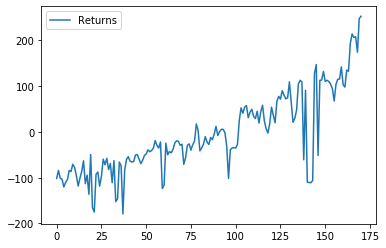

In [9]:
import matplotlib.pyplot as plt

plt.plot(range(len(returns)), returns, label='Returns')
plt.legend()
plt.show()